# E-COMMERCE CUSTOMER SEGMENTATION AND PREDICTION 

### step 1: import all necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import timedelta

import warnings
warnings.filterwarnings("ignore")


### step 2: load the data

In [2]:
data = pd.read_csv("data.csv", encoding='ISO-8859-1')

In [3]:
#top 5 rows

data.head() 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
# check the data types

data.dtypes  

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [5]:
# check null values

data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
# check the size 

data.shape

(541909, 8)

In [7]:
# check the statistical summary

data.describe(include="all")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900,4070,4223,NaN,23260,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,10/31/2011 14:41,NaN,NaN,United Kingdom
freq,1114,2313,2369,NaN,1114,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16791.000000,NaN


In [8]:
# check the columns

data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

### step 3: data cleaning

In [9]:
#droping the rows where the customer id is missing

data.dropna(subset=["CustomerID"], inplace=True)

In [10]:
# removing the cancelled orders

data = data[~data["InvoiceNo"].astype(str).str.contains("C", na=False)]

In [11]:
# removing the rows where quantity and unitprice is negative and zero

data = data[(data["Quantity"] > 0) & (data["UnitPrice"] > 0)]

In [12]:
# create new column

data["TotalAmount"] = data["Quantity"] * data["UnitPrice"]

In [13]:
data.shape

(397884, 9)

In [14]:
# droping the duplicates 

data.drop_duplicates(inplace=True)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392692 non-null  object 
 1   StockCode    392692 non-null  object 
 2   Description  392692 non-null  object 
 3   Quantity     392692 non-null  int64  
 4   InvoiceDate  392692 non-null  object 
 5   UnitPrice    392692 non-null  float64
 6   CustomerID   392692 non-null  float64
 7   Country      392692 non-null  object 
 8   TotalAmount  392692 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 30.0+ MB


### step 3: Feature Engineering 

In [16]:
# covverting invoicedate into date format

data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"])

In [17]:
# creating the additional features

data["InvoiceMonth"] = data["InvoiceDate"].dt.month
data["InvoiceYear"] = data["InvoiceDate"].dt.year
data["InvoiceDay"] = data["InvoiceDate"].dt.day
data["Hour"] = data["InvoiceDate"].dt.hour
data["Weekday"] = data["InvoiceDate"].dt.day_name()

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     392692 non-null  object        
 1   StockCode     392692 non-null  object        
 2   Description   392692 non-null  object        
 3   Quantity      392692 non-null  int64         
 4   InvoiceDate   392692 non-null  datetime64[ns]
 5   UnitPrice     392692 non-null  float64       
 6   CustomerID    392692 non-null  float64       
 7   Country       392692 non-null  object        
 8   TotalAmount   392692 non-null  float64       
 9   InvoiceMonth  392692 non-null  int32         
 10  InvoiceYear   392692 non-null  int32         
 11  InvoiceDay    392692 non-null  int32         
 12  Hour          392692 non-null  int32         
 13  Weekday       392692 non-null  object        
dtypes: datetime64[ns](1), float64(3), int32(4), int64(1), object(5)
memory us

## step 4: Exploratory Data Analysis 
### Univariate Analysis

#### 4.1) Distribution of Quantity purchased

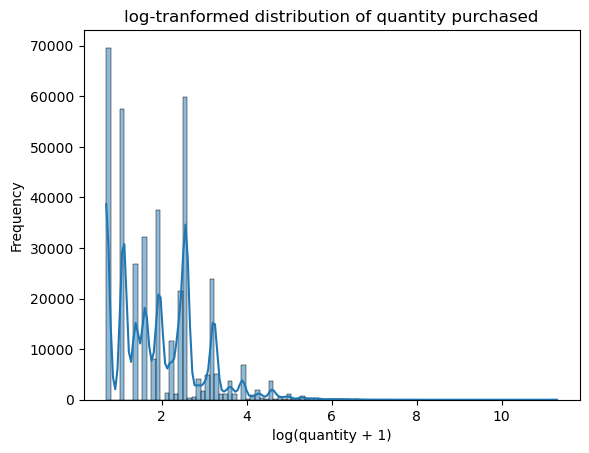

In [19]:
data["Log_Quantity"] = np.log1p(data["Quantity"])

sns.histplot(data["Log_Quantity"], bins=100, kde=True)
plt.title("log-tranformed distribution of quantity purchased")
plt.xlabel("log(quantity + 1)")
plt.ylabel("Frequency")
plt.show()

 Interpretation:

The distribution of quantity purchased is highly right-skewed in its raw form, indicating that a small number of transactions involve extremely high quantities. To handle this skewness and gain better visibility into customer behavior, a log transformation (log1p) was applied.

Post-transformation, the distribution reveals that most transactions involve lower quantities (log values between 1 and 4), which corresponds to actual quantities ranging approximately from 1 to 50 units. This insight is critical for clustering or segmentation, as it suggests that a few large-quantity purchases disproportionately affect raw statistics.

#### 4.2) Distribution of Unitprice 

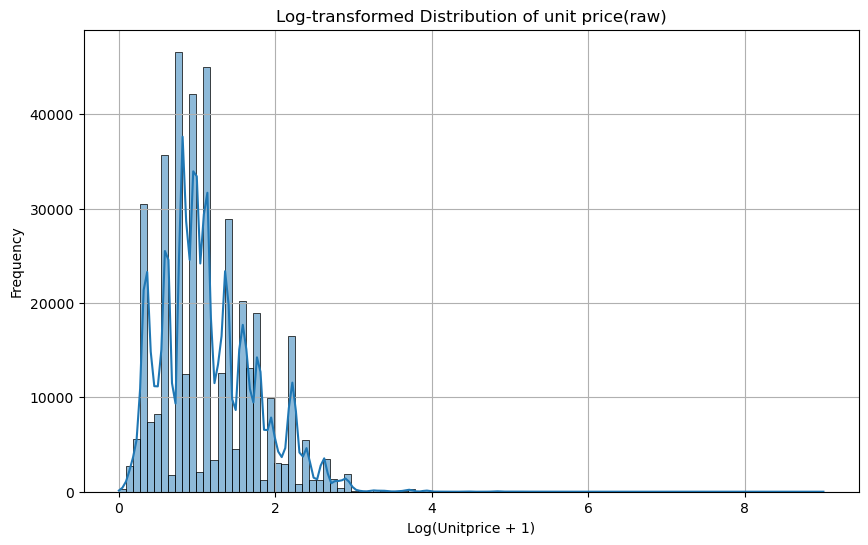

In [20]:
data["Log_UnitPrice"] = np.log1p(data["UnitPrice"])

plt.figure(figsize=(10,6))
sns.histplot(data["Log_UnitPrice"], bins=100, kde= True)
plt.title("Log-transformed Distribution of unit price(raw)")
plt.xlabel("Log(Unitprice + 1)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

Observation:
From the distribution of Unit Price, we observe that:

A large number of products are priced under £10, showing that the platform sells mostly low-cost items.

The distribution is right-skewed, meaning there are a few high-priced outliers, but they are not common.

After applying log transformation, the data becomes more normalized, making patterns and comparisons easier to analyze.

This suggests that pricing strategy and demand are centered around affordable items, which may be important for segmentation or inventory planning

In [21]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalAmount', 'InvoiceMonth',
       'InvoiceYear', 'InvoiceDay', 'Hour', 'Weekday', 'Log_Quantity',
       'Log_UnitPrice'],
      dtype='object')

#### 4.3) Daily transactions over time

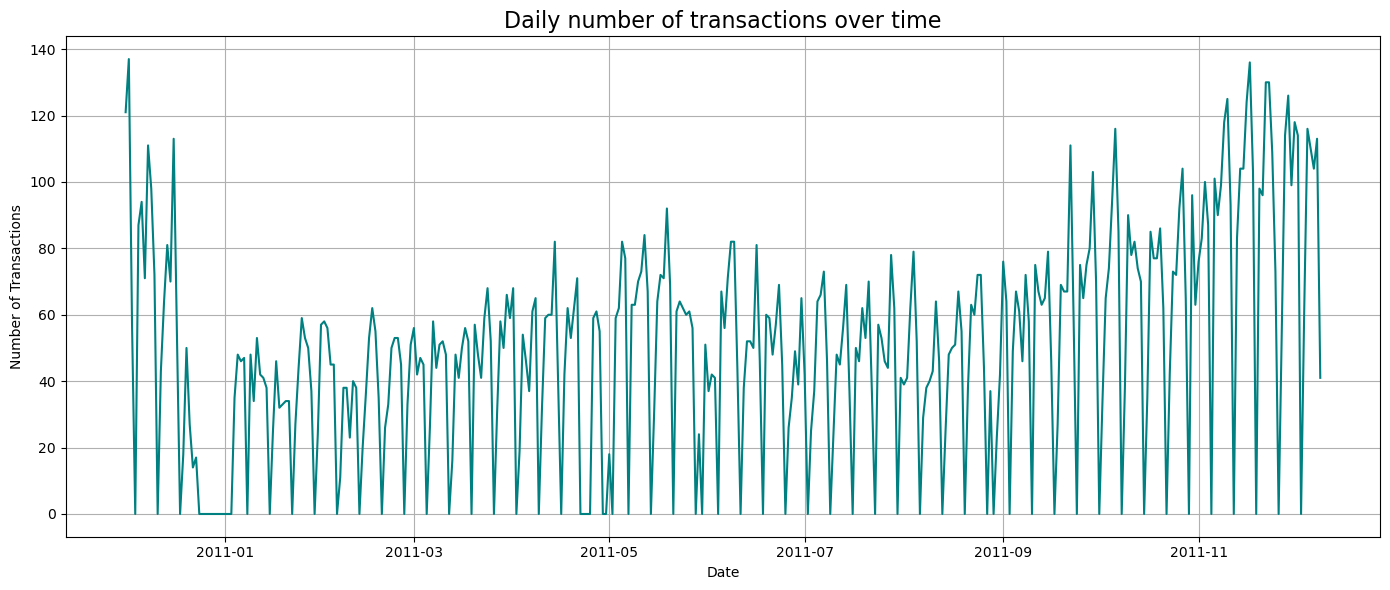

In [22]:
daily_transactions = data.set_index("InvoiceDate").resample("D")["InvoiceNo"].nunique()

#plotting

plt.figure(figsize=(14,6))
sns.lineplot(x=daily_transactions.index, y=daily_transactions.values, color="teal")
plt.title("Daily number of transactions over time", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Number of Transactions")
plt.grid(True)
plt.tight_layout()
plt.show()

Observation:

There is a fluctuating pattern in the number of daily transactions, indicating natural variability in customer activity.

Certain spikes suggest promotional events, holidays, or seasonal surges in purchasing behavior.

Some periods show sharp drops or flat lines, which may indicate weekends, holidays, or data loss (especially if the company does not operate every day).

Overall, the plot helps identify high-performing days and can guide decisions on campaign timing, inventory stocking, and customer engagement windows.

#### 4.4) Transactions by Hour of Day

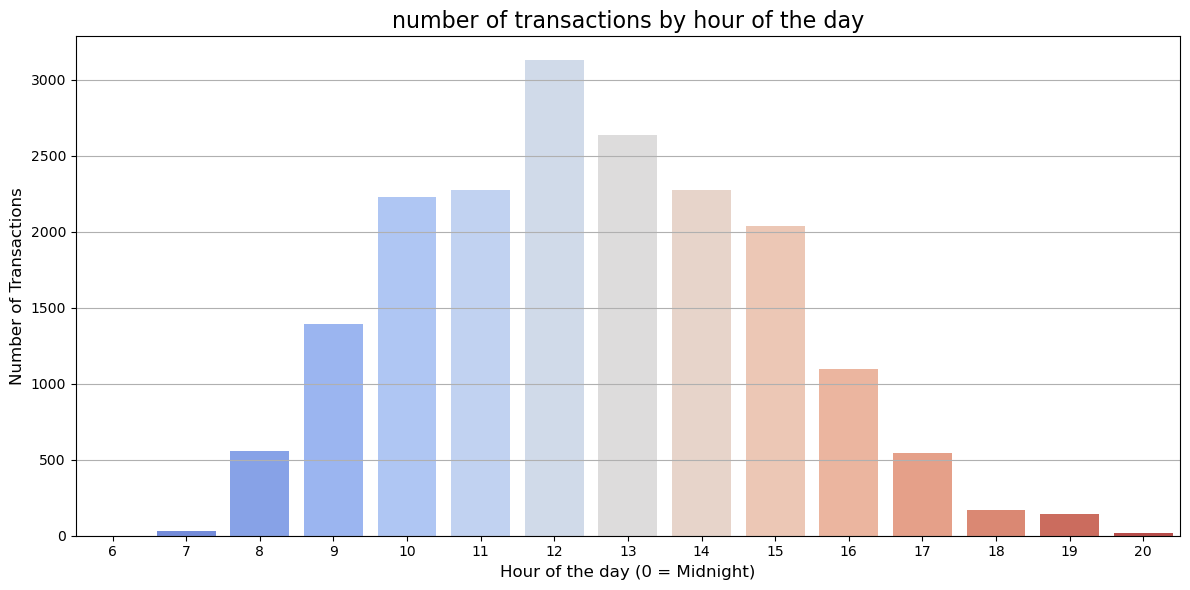

In [23]:
hourly_transactions = data.groupby("Hour")["InvoiceNo"].nunique()

#Plotting

plt.figure(figsize=(12,6))
sns.barplot(x=hourly_transactions.index, y=hourly_transactions.values, palette="coolwarm")
plt.title("number of transactions by hour of the day", fontsize=16)
plt.xlabel("Hour of the day (0 = Midnight)",fontsize=12)
plt.ylabel("Number of Transactions", fontsize=12)
plt.grid(axis="y")
plt.tight_layout()
plt.show()

~ Observation:

The majority of transactions occur between 9 AM and 5 PM, aligning with typical business hours, which suggests the platform is used mainly during working hours — possibly by businesses or offices.

There is a sharp decline in transactions before 8 AM and after 6 PM, indicating minimal customer activity during early mornings and late evenings.

The peak transaction hours suggest the ideal time to:

Schedule marketing emails or campaigns

Push real-time offers

Ensure system uptime and customer service availability during high-traffic hours



#### 4.5) Transactions by Weekday

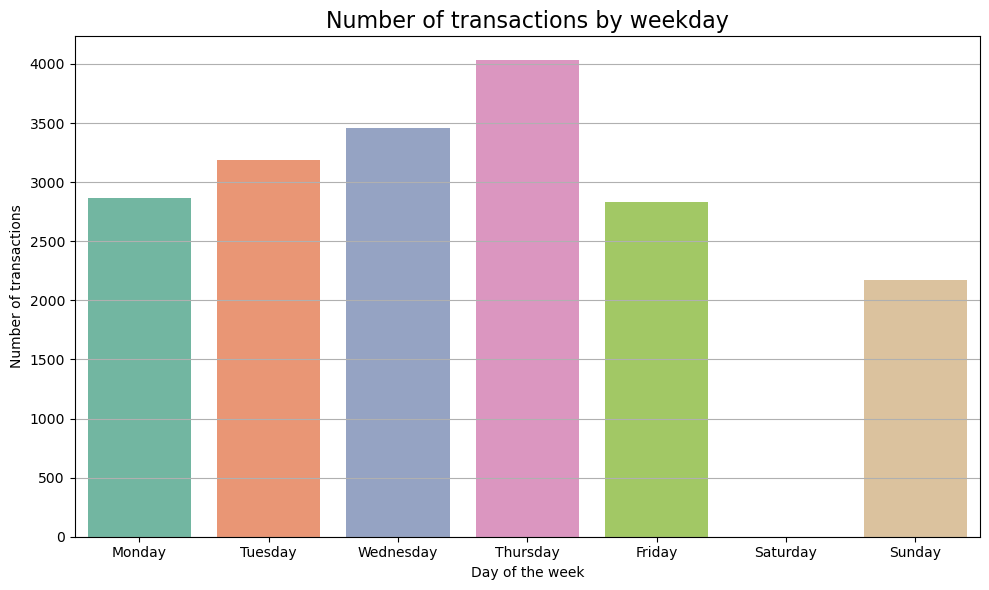

In [24]:
data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"])

data["Weekday"] = data["InvoiceDate"].dt.weekday

weekday_map = {
    0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday",
    4: "Friday", 5: "Saturday", 6: "Sunday"
}

data["WeekdayName"] = data["Weekday"].map(weekday_map)

# group and plot

weekday_orders = data.groupby("WeekdayName")["InvoiceNo"].nunique().reindex([
    "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"
])

plt.figure(figsize=(10,6))
sns.barplot(x=weekday_orders.index, y=weekday_orders.values, palette="Set2")
plt.title("Number of transactions by weekday", fontsize=16)
plt.xlabel("Day of the week")
plt.ylabel("Number of transactions")
plt.grid(axis="y")
plt.tight_layout()
plt.show()
         

~ Observation:

- **Most transactions occur on weekdays**, with **Thursday** and **Wednesday** typically being the busiest days.
- **Weekends (especially Sunday)** show a **significant drop** in activity, indicating that either:
  - The business doesn’t operate or ship on weekends, or
  - Customers prefer making purchases during workdays, possibly suggesting **B2B (business-to-business)** behavior.
- This pattern is valuable for:
  - **Planning inventory restocking** and **logistics** around peak days.
  - **Scheduling marketing campaigns** earlier in the week for maximum visibility.
  - **Avoiding major launches on weekends**, as engagement is likely lower.

#### 4.6) Transactions by Weekday and Hour (heatmap)

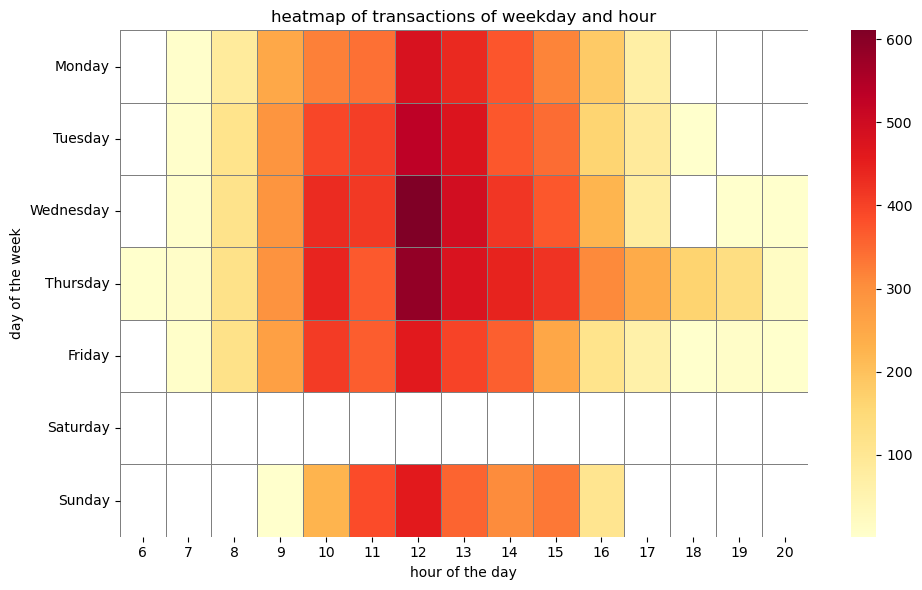

In [25]:
heatmap_data = data.pivot_table(
    index="WeekdayName",
    columns="Hour",
    values="InvoiceNo",
    aggfunc="nunique"
).reindex([
    "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"
])

plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, cmap="YlOrRd", linewidths=0.5, linecolor="gray")
plt.title("heatmap of transactions of weekday and hour")
plt.xlabel("hour of the day")
plt.ylabel("day of the week")
plt.tight_layout()
plt.show()

Heatmap of Transactions by Weekday and Hour – Interpretation

- The heatmap displays transaction counts across different hours of the day and days of the week.
- **Wednesday at 12 PM** shows the highest transaction volume, followed by Tuesday and Thursday during mid-day hours.
- **Weekdays (Monday to Friday)** generally show high activity between **10 AM and 3 PM**, indicating peak business hours.
- **Sunday** shows lower but present transaction activity, mostly between **10 AM and 3 PM**.
- **Saturday has no recorded data**, suggesting either:
  - The business is not operational on Saturdays, or
  - Transaction records for Saturdays are missing from the dataset.

> **Note:** The absence of data for Saturday should be investigated to ensure completeness and accuracy of the dataset.

#### 4.7) Top 10 Countries by Transaction Volume

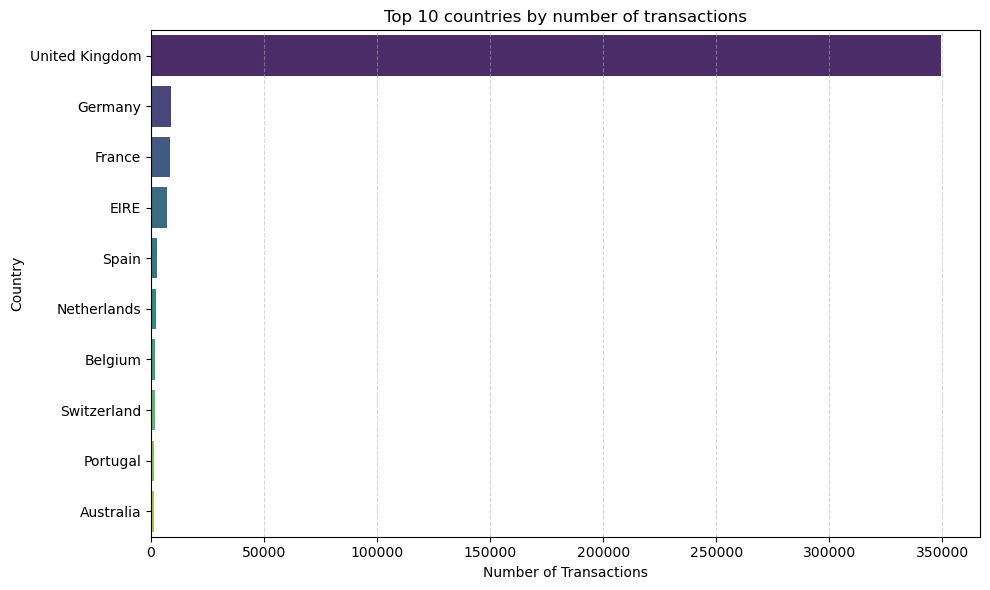

In [26]:
country_counts = data["Country"].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=country_counts.values, y=country_counts.index, palette="viridis")
plt.title("Top 10 countries by number of transactions")
plt.xlabel("Number of Transactions")
plt.ylabel("Country")
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

Observation: Top 10 Countries by Number of Transactions

- The **United Kingdom** dominates the dataset with the highest number of transactions by a large margin.
- Other top contributing countries include **Germany**, **France**, **EIRE (Ireland)**, and **Spain**, but they contribute significantly less compared to the UK.
- The skewed distribution indicates that the business is largely focused or most active in the UK market.
- This may imply either a UK-based company or a predominantly UK customer base.

#### 4.8) Top 10 customers by Total Spend

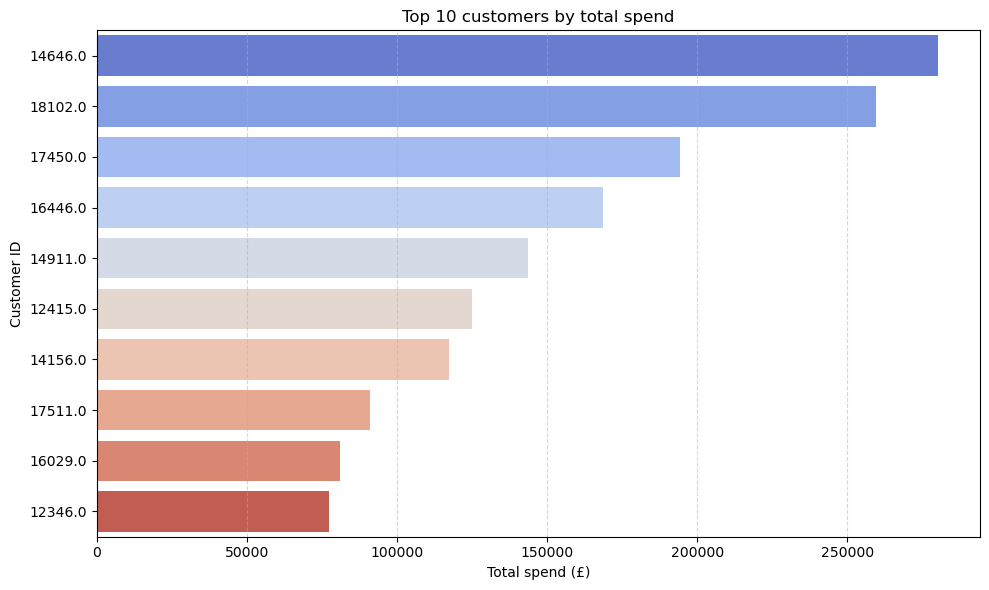

In [27]:
customer_spend = data.groupby("CustomerID")["TotalAmount"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=customer_spend.values, y=customer_spend.index.astype(str), palette="coolwarm")
plt.title("Top 10 customers by total spend")
plt.xlabel("Total spend (£)")
plt.ylabel("Customer ID")
plt.grid(axis="x", linestyle ="--", alpha=0.5)
plt.tight_layout()
plt.show()

### Observation: Top 10 Customers by Total Spending

- The chart identifies the top 10 customers who have spent the most in the dataset.
- There is a clear distinction in spending, with the top customer spending significantly more than the others.
- This suggests that a small group of customers contributes a large portion of the revenue — consistent with the **Pareto Principle (80/20 rule)**.
- These high-value customers can be targeted for **loyalty programs, exclusive offers, or retention strategies** to ensure continued engagement and maximize revenue.


#### 4.9) Top 10 Most sold products

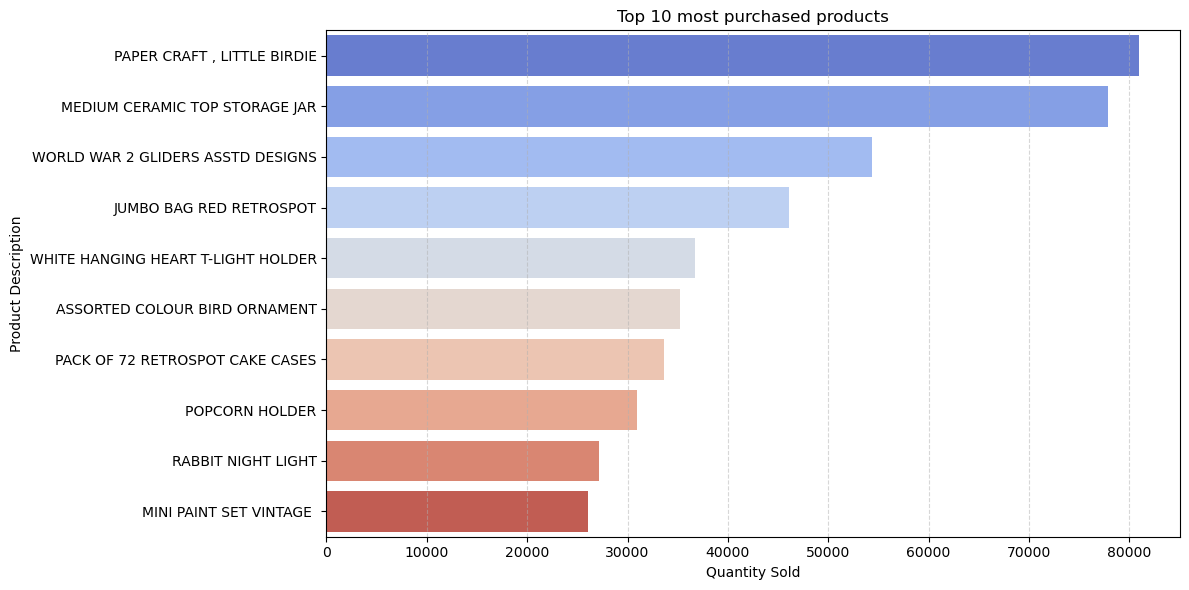

In [28]:
top_products = data.groupby("Description")["Quantity"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_products.values, y=top_products.index, palette="coolwarm")
plt.title("Top 10 most purchased products")
plt.xlabel("Quantity Sold")
plt.ylabel("Product Description")
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

 Observation:

- The bar chart highlights the 10 products with the highest quantity sold.
- These products are consistently in high demand, making them key drivers of inventory movement and revenue.
- Understanding top-selling products helps in:
  - Prioritizing **inventory planning** and restocking.
  - Designing **promotional strategies** around popular items.
  - Recognizing product trends and customer preferences.
- Businesses can use this insight to avoid stockouts and ensure the availability of fast-moving items.

### 4.10) Top 10 countries by sales (Excluding UK)

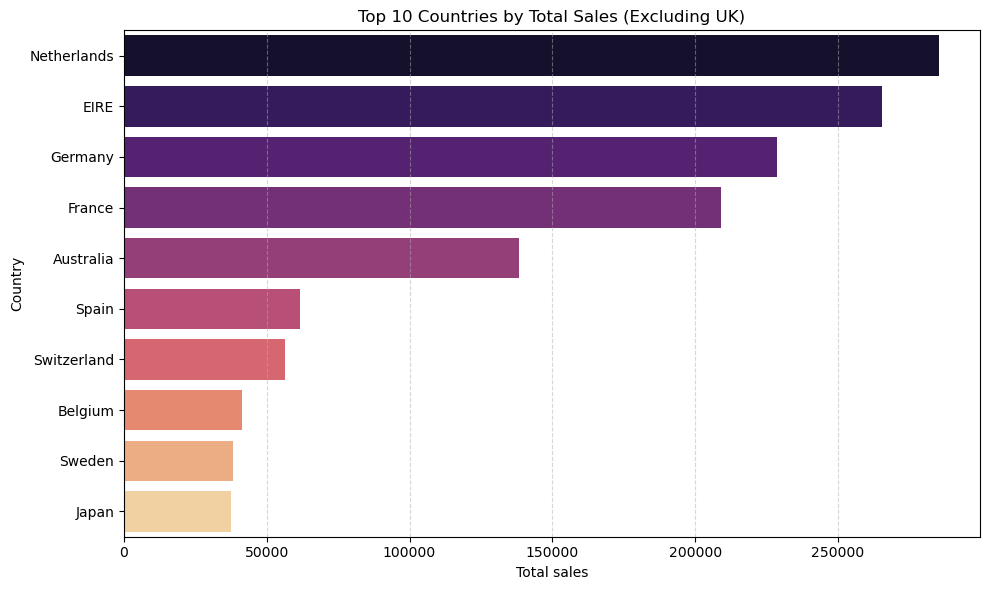

In [29]:
country_sales = data.groupby("Country")["TotalAmount"].sum().sort_values(ascending=False)

top_countries = country_sales[country_sales.index != "United Kingdom"].head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="magma")
plt.title("Top 10 Countries by Total Sales (Excluding UK)")
plt.xlabel("Total sales")
plt.ylabel("Country")
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

Observation: 

- The plot shows the top 10 countries contributing the most to total revenue, excluding the United Kingdom.
- A **significant portion of sales still comes from a handful of countries**, indicating strong international demand.
- Countries like the **Netherlands, Germany, France, and Ireland** are top contributors outside the UK.
- These markets are crucial for **targeted marketing, logistics optimization, and expansion strategies**.
- Understanding purchasing behavior and preferences in these countries can help **tailor promotions and improve international retention**.

### 4.11) Monthly sales trend

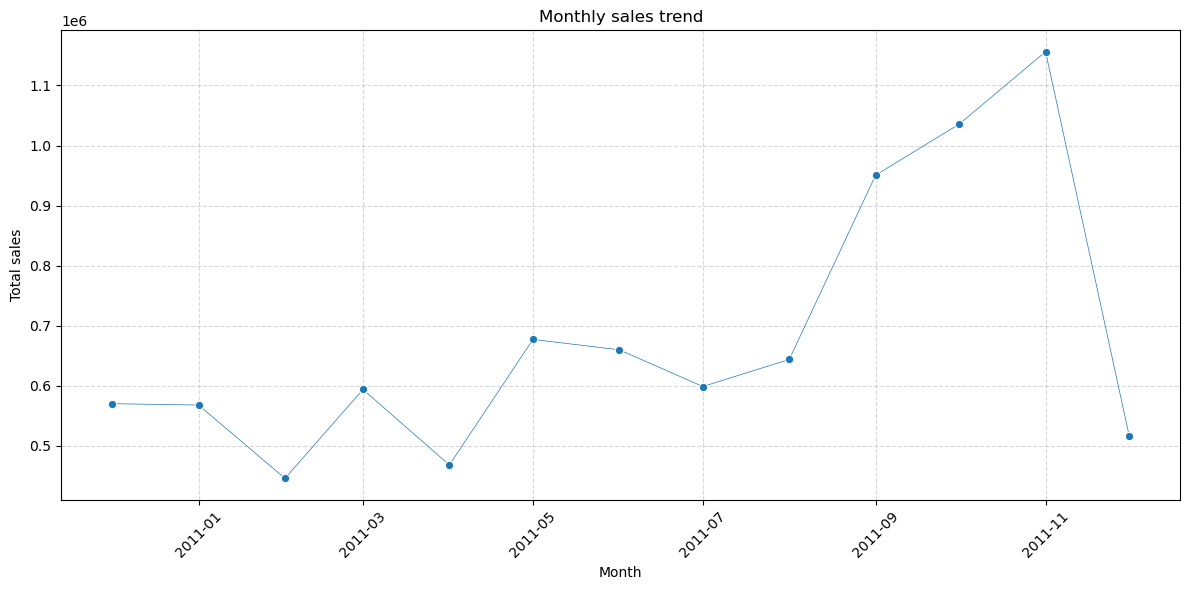

In [30]:
monthly_sales = data.groupby(["InvoiceYear", "InvoiceMonth"])["TotalAmount"].sum().reset_index()

monthly_sales["Month_Year"] = pd.to_datetime(monthly_sales["InvoiceYear"].astype(str) + "-" + monthly_sales["InvoiceMonth"].astype(str), format="%Y-%m")

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales, x="Month_Year", y="TotalAmount",marker="o",linewidth=0.5)
plt.title("Monthly sales trend")
plt.xlabel("Month")
plt.ylabel("Total sales")
plt.grid(True, linestyle="--", alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


 Observation:

- The line plot reveals **clear fluctuations in monthly revenue**, indicating potential seasonality in customer purchasing behavior.
- Notable **spikes in sales can be seen around November and December**, likely due to the holiday shopping season.
- A **decline in sales is often observed in the early months (e.g., January and February)**, possibly due to post-holiday slowdowns.
- These insights suggest that **marketing and inventory planning should align with high-demand months**, especially Q4.
- Understanding monthly trends can guide **budget allocation, promotional campaigns, and stock management**.

### 4.12) Hourly sales trends

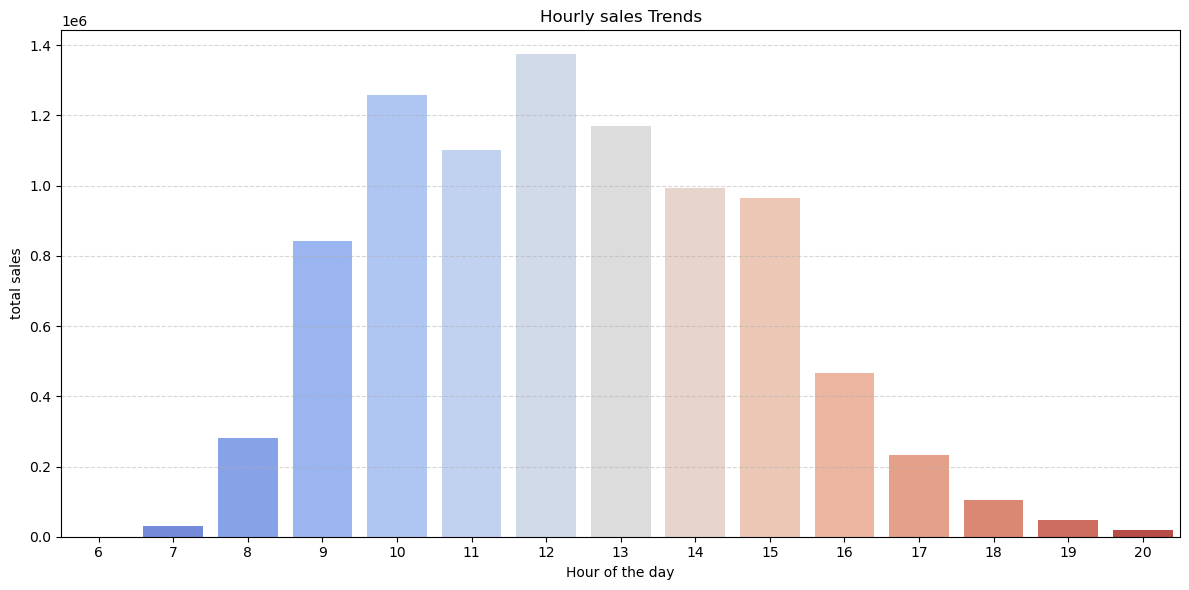

In [31]:
hourly_sales = data.groupby("Hour")["TotalAmount"].sum().reset_index()

#plottinn

plt.figure(figsize=(12,6))
sns.barplot(data=hourly_sales, x="Hour", y="TotalAmount", palette="coolwarm")
plt.title("Hourly sales Trends")
plt.xlabel("Hour of the day")
plt.ylabel("total sales")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

 Observation: 

- The bar plot clearly shows that **customer transactions are highly concentrated between 9 AM and 4 PM**, with the **peak around 11 AM to 1 PM**.
- Sales activity significantly **declines before 8 AM and after 6 PM**, indicating that most purchases occur during regular business hours.
- This trend suggests that customers prefer shopping during daytime, likely from offices or during breaks.
- Businesses can **optimize marketing campaigns, customer support, and website performance** during these high-traffic hours to boost conversion rates.

### 4.13) Top 10 products by revenue

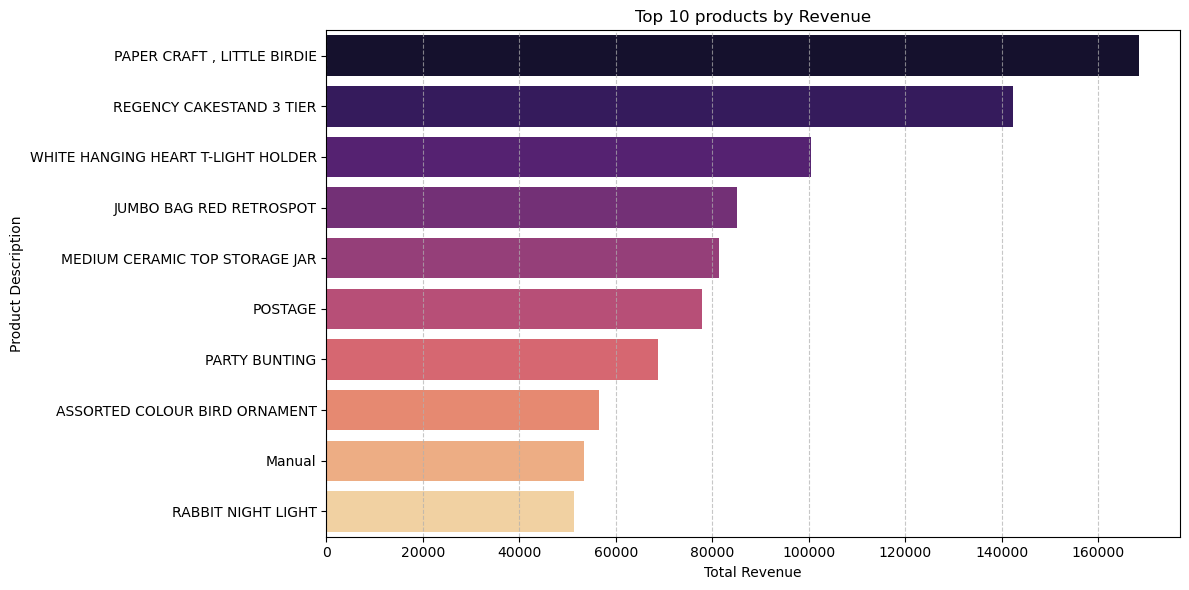

In [32]:
top_products = data.groupby("Description")["TotalAmount"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_products.values, y=top_products.index, palette="magma")
plt.title("Top 10 products by Revenue")
plt.xlabel("Total Revenue")
plt.ylabel("Product Description")
plt.grid(axis="x", linestyle="--",alpha=0.7)
plt.tight_layout()
plt.show()

**Observation: Top 10 Products by Revenue**

- The bar plot shows that **revenue is heavily concentrated among a few products**.
- The **top 10 products** generate the **majority of total sales**, indicating they are either **best-sellers** or have **higher price points**.
- This concentration suggests a **Pareto effect** — where roughly **20% of products drive 80% of revenue**.
- Businesses can benefit by focusing on these high-revenue items for **stock management**, **promotions**, and **marketing campaigns**.
- Understanding why these specific products perform well can help guide **future sales strategy** and **product offerings**.

In [33]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalAmount', 'InvoiceMonth',
       'InvoiceYear', 'InvoiceDay', 'Hour', 'Weekday', 'Log_Quantity',
       'Log_UnitPrice', 'WeekdayName'],
      dtype='object')

### 4.14) Customer purchase frequency

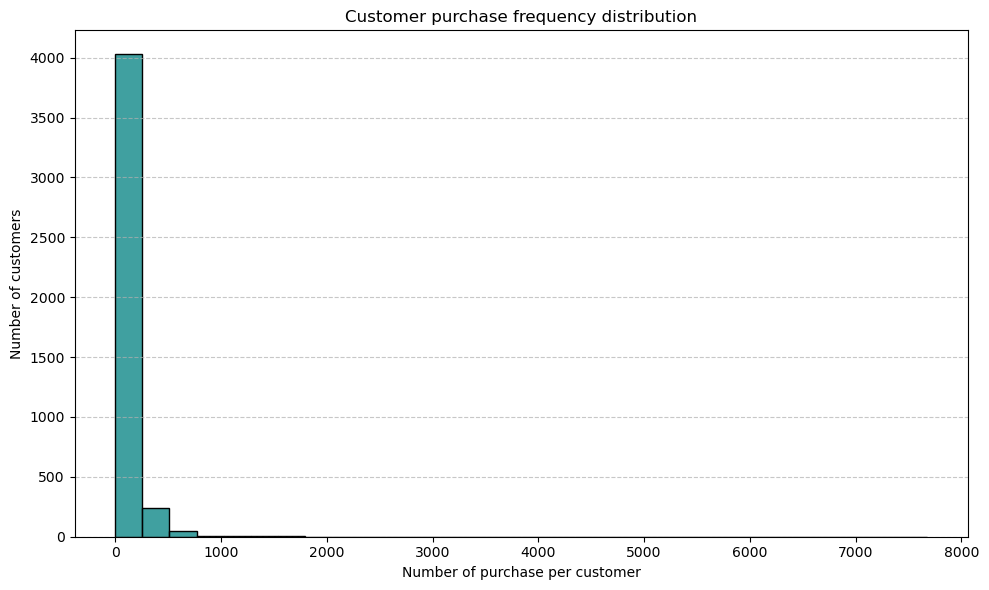

In [34]:
customer_freq = data["CustomerID"].value_counts()

plt.figure(figsize=(10,6))
sns.histplot(data=customer_freq, bins=30, kde=False, color="teal")
plt.title("Customer purchase frequency distribution")
plt.xlabel("Number of purchase per customer")
plt.ylabel("Number of customers")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

#### Under 1000 purchases

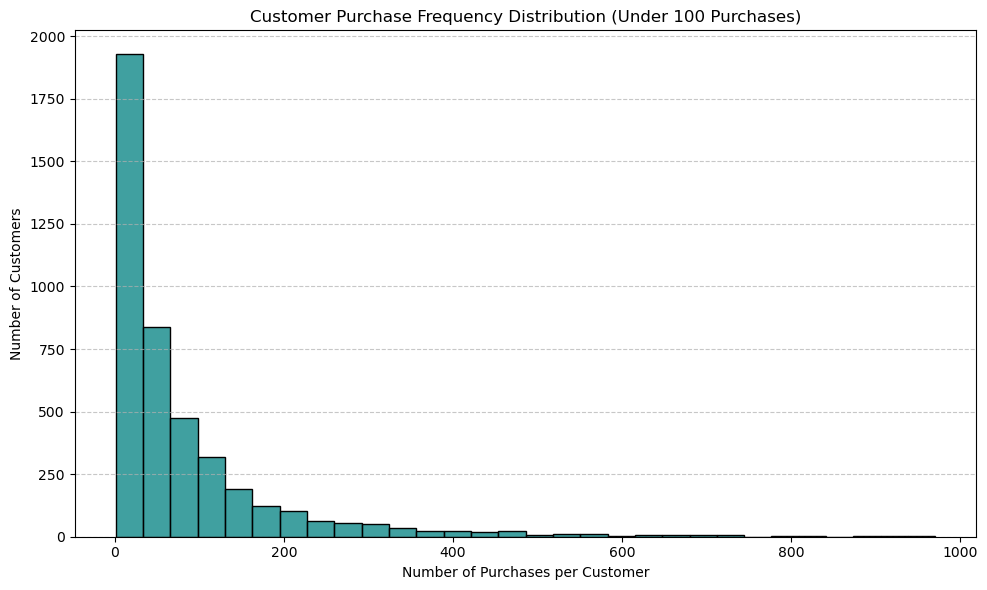

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(customer_freq[customer_freq < 1000], bins=30, color='teal')  # Filter out large outliers
plt.title("Customer Purchase Frequency Distribution (Under 100 Purchases)")
plt.xlabel("Number of Purchases per Customer")
plt.ylabel("Number of Customers")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Observation:**

- The histogram reveals that **most customers made fewer than 20 purchases**, with a sharp drop-off after that point.
- The distribution is **right-skewed**, meaning a **few customers purchase very frequently**, but the **majority are low-frequency buyers**.
- This suggests that while the business attracts many customers, **repeat engagement is limited**.
- By filtering out extreme outliers, we gain a **clearer view of typical customer behavior**, which is crucial for planning retention strategies.
- Businesses should focus on **converting one-time buyers into repeat customers** through **personalized offers**, **email reminders**, or **loyalty programs**.

### 4.15) RFM Distribution (Recency, Frequency, Monetary)

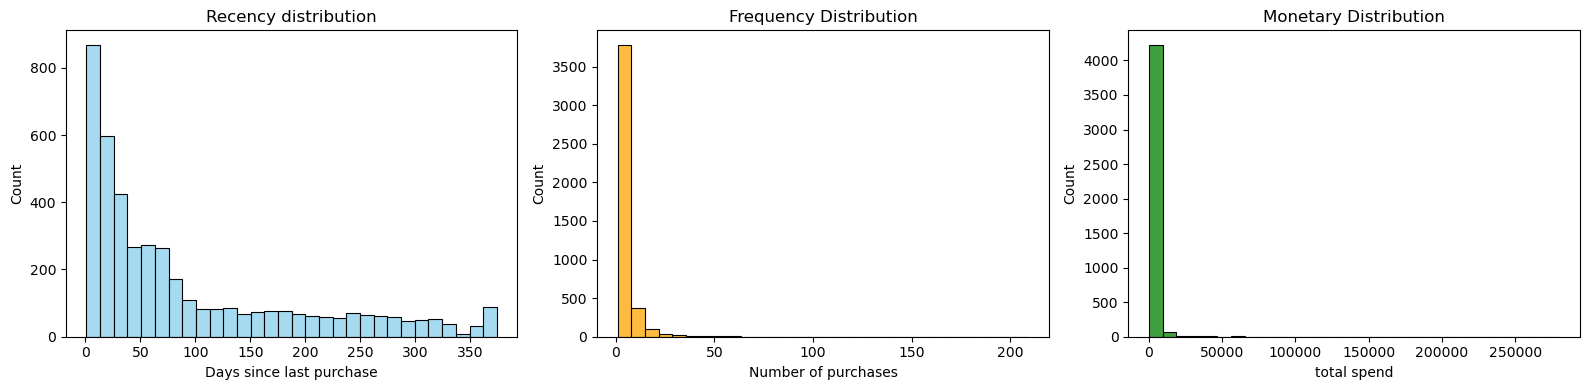

In [36]:
# reference date for recency calculation
reference_date = data["InvoiceDate"].max() + pd.Timedelta(days=1)

#Group by customerID to calculate RFM

rfm = data.groupby("CustomerID").agg({
    "InvoiceDate": lambda x: (reference_date - x.max()).days,
    "InvoiceNo": "nunique",
    "TotalAmount": "sum"
}).rename(columns={
    "InvoiceDate": "Recency",
    "InvoiceNo": "Frequency",
    "TotalAmount": "Monetary"
})

# plotting histograms for each RFM component

plt.figure(figsize=(16,4))

plt.subplot(1, 3, 1)
sns.histplot(rfm["Recency"], bins=30, color="skyblue")
plt.title("Recency distribution")
plt.xlabel("Days since last purchase")


plt.subplot(1, 3, 2)
sns.histplot(rfm["Frequency"], bins=30, color="orange")
plt.title("Frequency Distribution")
plt.xlabel("Number of purchases")

plt.subplot(1, 3, 3)
sns.histplot(rfm["Monetary"], bins=30, color="green")
plt.title("Monetary Distribution")
plt.xlabel("total spend")

plt.tight_layout()
plt.show()

**Observation: RFM Distribution**

- **Recency**: Most customers made their last purchase **within the last 100 days**, showing active recent engagement. A few have not returned in a long time.
- **Frequency**: The majority of customers have a **low purchase count**, reinforcing earlier findings that most are **infrequent buyers**.
- **Monetary**: Spending is **highly skewed**, with a small group of customers contributing a **large portion of total revenue**.
- These patterns highlight the importance of **segmenting customers**: some need reactivation (high recency), others are **loyal high spenders** (high frequency and monetary).
- Businesses can use this segmentation to **target campaigns more effectively** and improve **Customer Lifetime Value (CLV)**.

### 4.16) Sales trends by Country over time

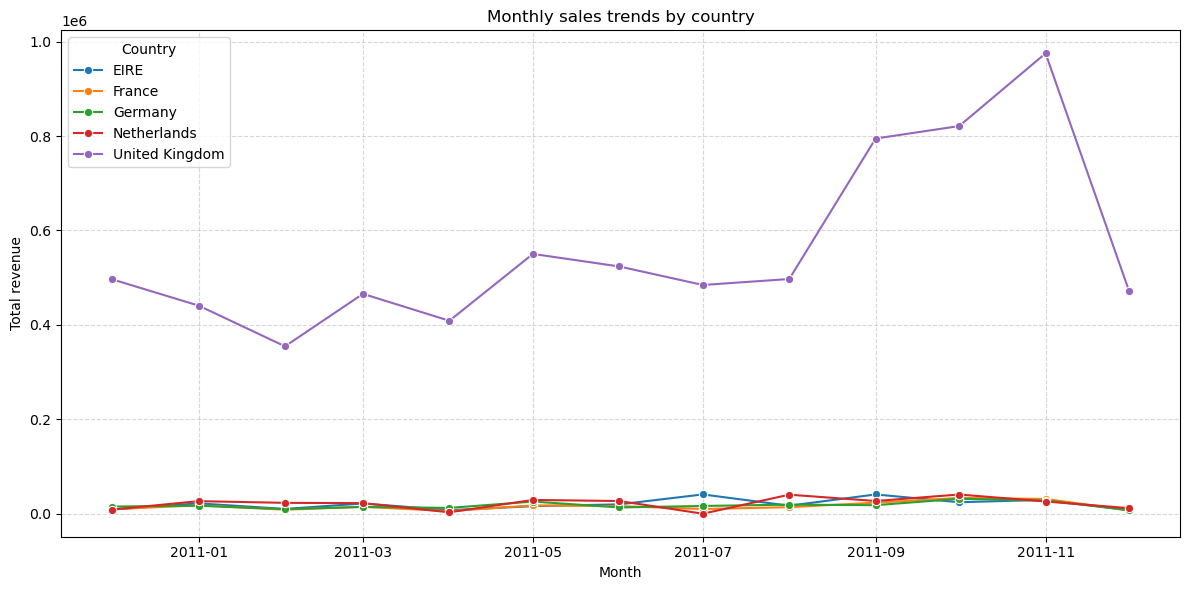

In [37]:
#get the top 5 countries by total revenue
top_countries = data.groupby("Country")["TotalAmount"].sum().sort_values(ascending=False).head(5).index

#filter data for those countries
filtered_data = data[data["Country"].isin(top_countries)]

# Group by month and country
monthly_sales = filtered_data.groupby(["InvoiceYear", "InvoiceMonth", "Country"])["TotalAmount"].sum().reset_index()

#creating month-year column for proper sorting on x-axis
monthly_sales["MonthYear"] = pd.to_datetime(dict(year=monthly_sales.InvoiceYear, month=monthly_sales.InvoiceMonth, day=1))


#plotting

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales, x="MonthYear", y="TotalAmount",hue="Country", marker="o")
plt.title("Monthly sales trends by country")
plt.xlabel("Month")
plt.ylabel("Total revenue")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

Observation: 

- The line plot illustrates **monthly sales performance** across the **top 5 countries** by total revenue.
- We observe **distinct seasonal trends** in some countries, with noticeable **spikes during peak months**, potentially due to holidays or promotions.
- Countries like **United Kingdom** show consistently **higher sales volume**, making them critical to overall business performance.
- Other countries exhibit **more variability**, suggesting room for growth with targeted campaigns or regional strategies.
- Understanding these trends can help businesses **optimize inventory**, **launch campaigns**, and **adjust logistics** to meet localized demand patterns.

### 4.17) Top customers by frequency of purchase

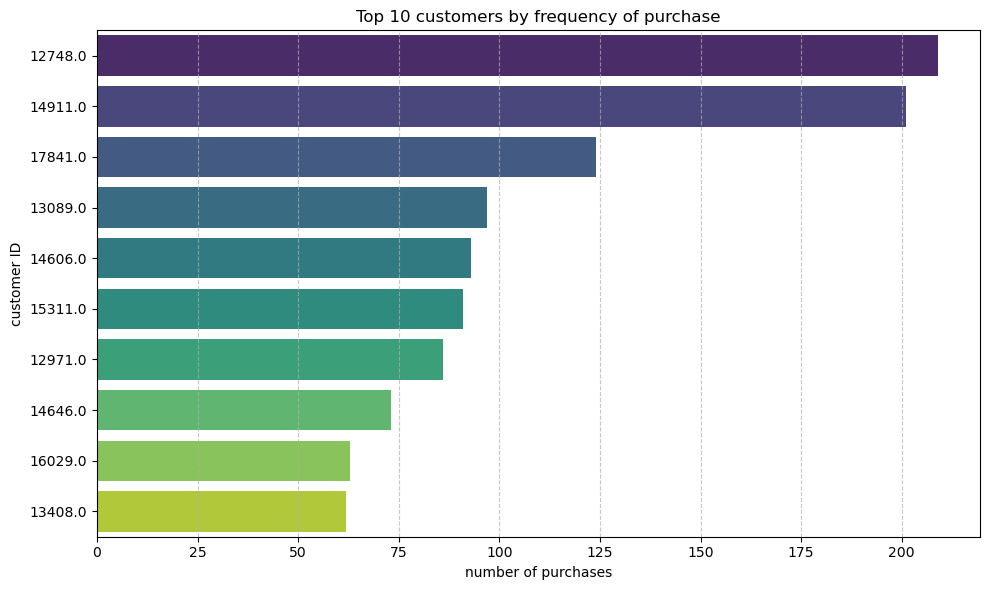

In [38]:
# calculate frequency per customer

customer_freq = data.groupby("CustomerID")["InvoiceNo"].nunique().sort_values(ascending=False).head(10)

# plot

plt.figure(figsize=(10,6))
sns.barplot(x=customer_freq.values, y=customer_freq.index.astype(str),palette="viridis")
plt.title("Top 10 customers by frequency of purchase")
plt.xlabel("number of purchases")
plt.ylabel("customer ID")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

Observation:

- The bar plot highlights the **top 10 most frequent buyers**, based on the number of unique purchase transactions.
- These customers are **highly engaged**, showing a strong tendency to return and buy repeatedly.
- The gap between the top few and the rest suggests that a **small group of customers drive a significant portion of purchase activity**.
- These individuals are excellent candidates for **VIP programs**, **exclusive offers**, or **early product releases**.
- Retaining and nurturing such loyal customers can greatly improve **customer retention rates** and **long-term profitability**.

### 4.18) Unitprice vs Quantity Scatterplot (log scale)

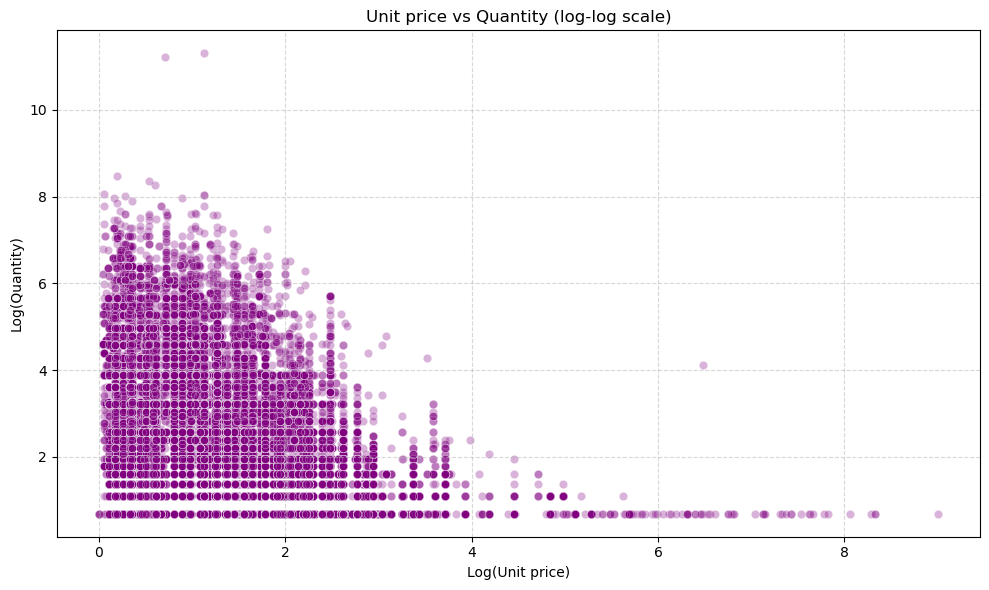

In [39]:
filtered = data[(data["UnitPrice"] > 0) & (data["Quantity"] > 0)]

plt.figure(figsize=(10,6))
sns.scatterplot(data=filtered, x="Log_UnitPrice", y="Log_Quantity", alpha=0.3, color="purple")
plt.title("Unit price vs Quantity (log-log scale)")
plt.xlabel("Log(Unit price)")
plt.ylabel("Log(Quantity)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

Observation:

- The scatterplot shows a **negative correlation** between **unit price and quantity** — as **price increases, the quantity purchased tends to decrease**.
- Most transactions are **clustered in the lower price and quantity range**, indicating high volume for **low-cost items**.
- The **log-log scale** helps uncover this pattern, which would be hidden in a regular plot due to **extreme outliers**.
- A few high-priced, high-quantity transactions exist, but they are rare and may represent **bulk or wholesale orders**.
- This insight can help in **pricing strategy**, **product bundling**, and identifying **price-sensitive segments**.

In [40]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalAmount', 'InvoiceMonth',
       'InvoiceYear', 'InvoiceDay', 'Hour', 'Weekday', 'Log_Quantity',
       'Log_UnitPrice', 'WeekdayName'],
      dtype='object')

### 4.19) Boxplot of total spend per country

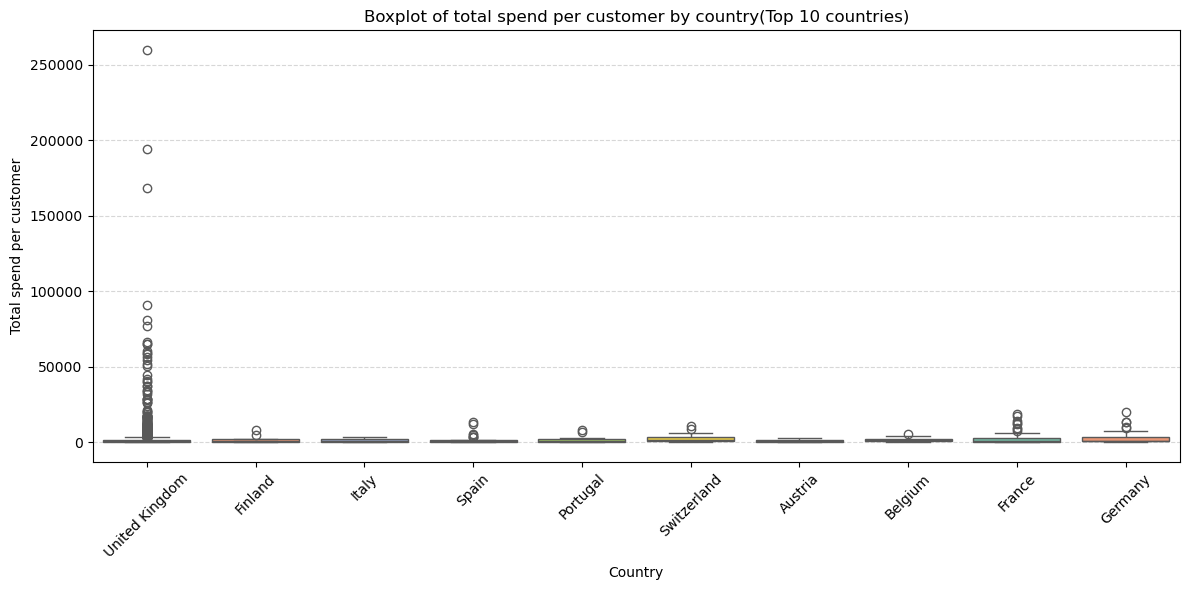

In [41]:
# calculate total spend per customer
customer_spend = data.groupby(["CustomerID", "Country"])["TotalAmount"].sum().reset_index()

# get top 10 countries by number of customers
top_countries = customer_spend["Country"].value_counts().head(10).index

filtered_spend = customer_spend[customer_spend["Country"].isin(top_countries)]

plt.figure(figsize=(12,6))
sns.boxplot(data=filtered_spend, x="Country", y="TotalAmount", palette="Set2")
plt.title("Boxplot of total spend per customer by country(Top 10 countries)")
plt.xlabel("Country")
plt.ylabel("Total spend per customer")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

Observation:

- The boxplot reveals **how spending behavior varies** across the top 10 countries by customer count.
- Some countries, like the **United Kingdom**, show **wide variability** in total spend, with several **high-value outliers**.
- Other countries exhibit **tighter ranges**, suggesting more consistent spending habits among customers.
- Outliers indicate **high-value customers** that could be targeted for **premium offerings** or **personalized service**.
- These insights can guide **market segmentation**, **campaign targeting**, and **regional pricing strategies**.

### 4.20) Time-Series Plot of Total revenue over time

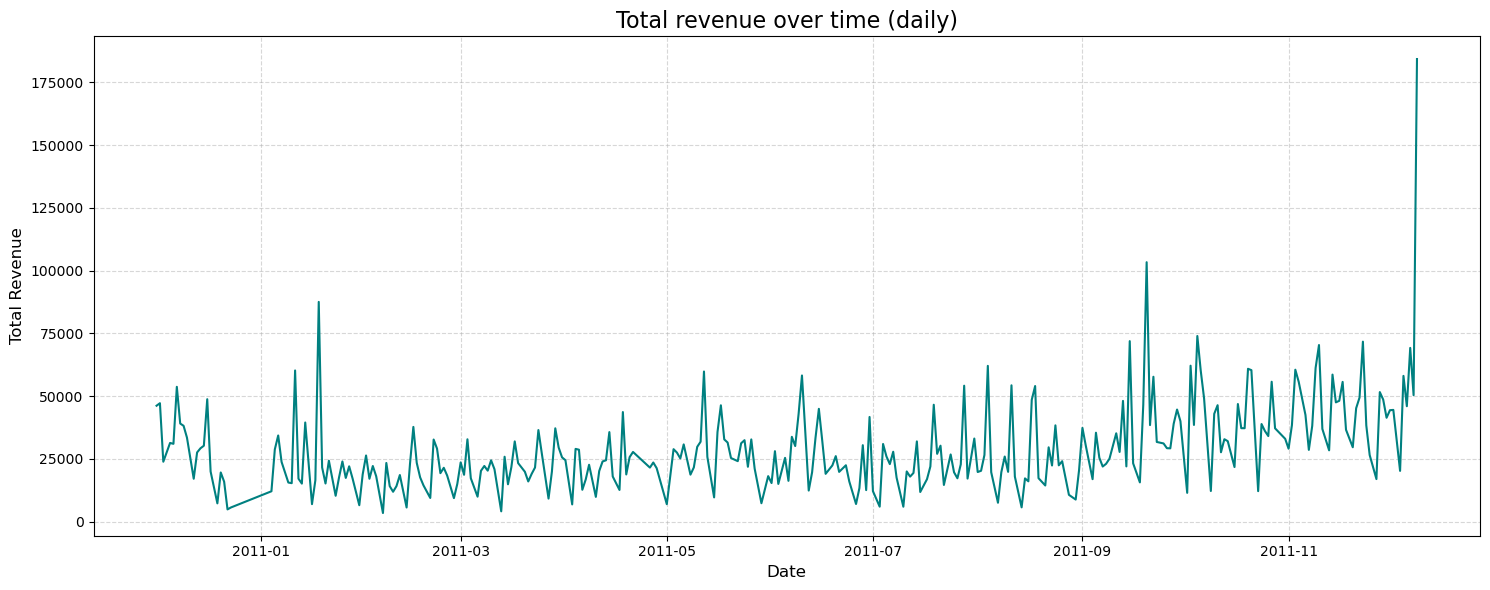

In [42]:
data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"])

# date only column
data["InvoiceDayOnly"] = data["InvoiceDate"].dt.date

daily_revenue = data.groupby("InvoiceDayOnly")["TotalAmount"].sum().reset_index()

plt.figure(figsize=(15,6))
sns.lineplot(data=daily_revenue, x="InvoiceDayOnly", y="TotalAmount", color="teal")
plt.title("Total revenue over time (daily)", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

Observation: Daily Revenue Trend

- The line plot shows the total revenue generated by the e-commerce platform on each day.
- There are several visible spikes, which may indicate periods of promotional events, holiday sales, or bulk purchases.
- A few days show little to no revenue — these may correspond to system downtimes or non-operational days like weekends or holidays.
- Identifying patterns in revenue trends helps the business to forecast demand and prepare inventory accordingly.

### 4.21) Average order value by country

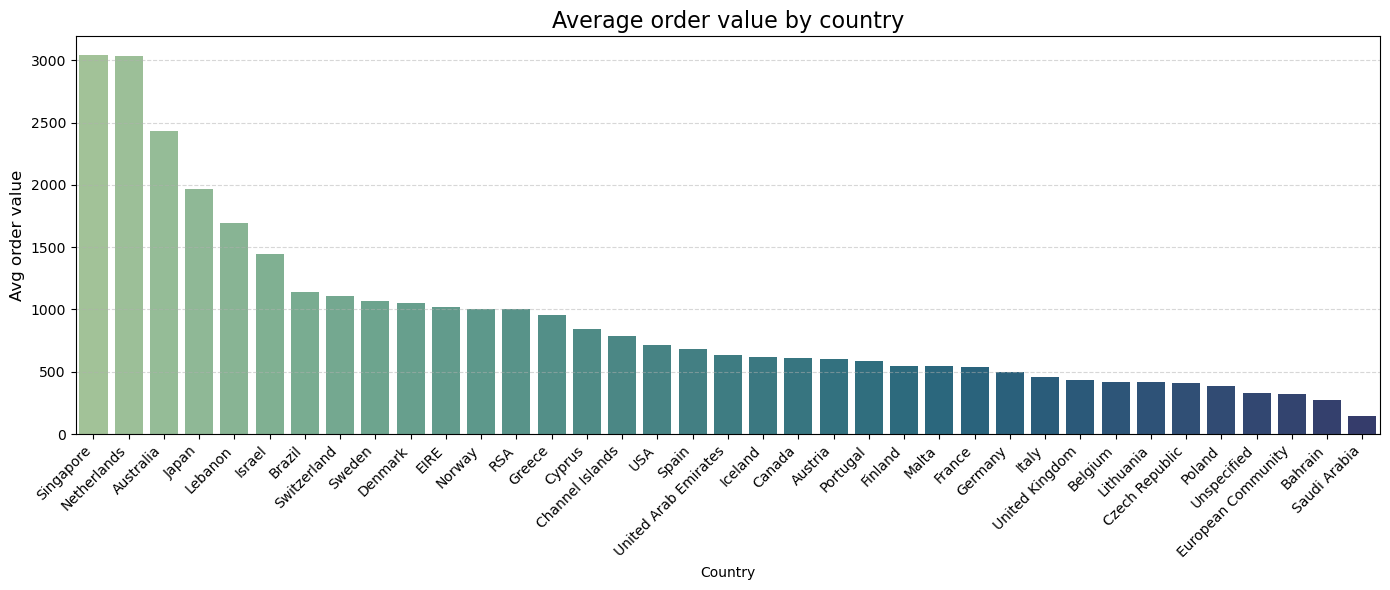

In [43]:
#remove negative and zero quantities and prices

clean_data = data[(data["Quantity"] > 0) & (data["UnitPrice"] > 0)]

# avg order value = total amount / number of orders per country

country_order_value = (
    clean_data.groupby("Country")["TotalAmount"].sum()
    / clean_data.groupby("Country")["InvoiceNo"].nunique()
).sort_values(ascending=False)

#plot

plt.figure(figsize=(14,6))
sns.barplot(x=country_order_value.index, y=country_order_value.values, palette="crest")
plt.title("Average order value by country",fontsize=16)
plt.ylabel("Avg order value", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

In [44]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalAmount', 'InvoiceMonth',
       'InvoiceYear', 'InvoiceDay', 'Hour', 'Weekday', 'Log_Quantity',
       'Log_UnitPrice', 'WeekdayName', 'InvoiceDayOnly'],
      dtype='object')

Observation:

- This bar plot displays the average order value (AOV) for each country.
- A few countries such as Netherlands and Australia show notably high average order values, suggesting customers from these regions make fewer but higher-value purchases.
- On the other hand, countries like the UK have a lower AOV despite a high transaction volume, which may indicate frequent but smaller orders.
- These insights can help tailor regional marketing campaigns and pricing strategies.

### 4.22) Basket size distribution

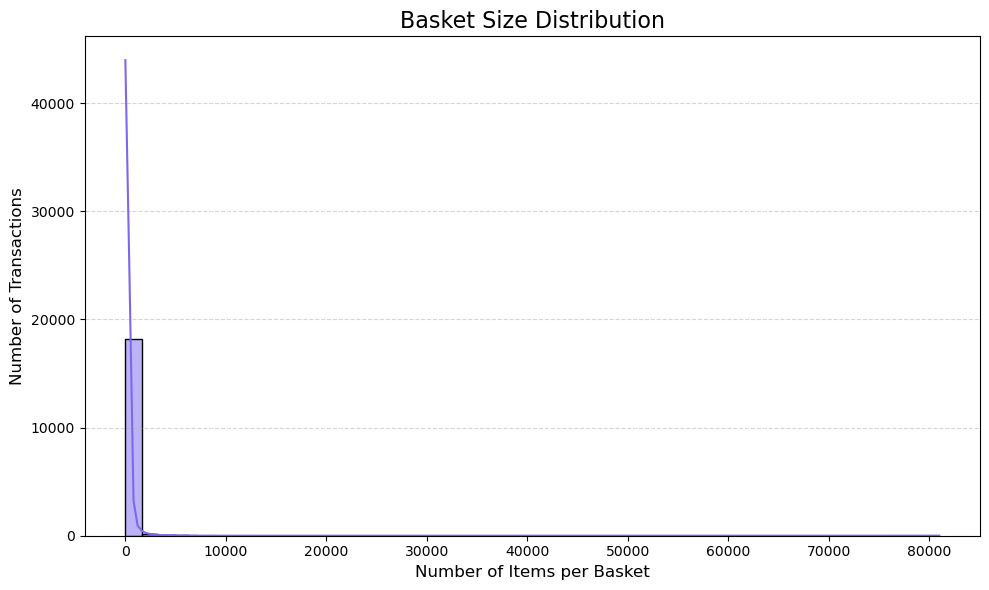

In [45]:
#sum of quantity per invoice
basket_sizes = data.groupby("InvoiceNo")["Quantity"].sum()

basket_sizes = basket_sizes[basket_sizes > 0]

#plot

plt.figure(figsize=(10,6))
sns.histplot(basket_sizes, bins=50, kde=True, color="mediumslateblue")
plt.title("Basket Size Distribution", fontsize=16)
plt.xlabel("Number of Items per Basket", fontsize=12)
plt.ylabel("Number of Transactions", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Observation:

- This histogram illustrates how many items customers usually purchase in a single transaction (basket).
- The distribution is **right-skewed**, meaning most transactions include fewer items, with a few very large baskets.
- Most customers tend to buy between 1 to 10 items per transaction.
- Identifying customers with consistently large basket sizes can help in targeting bulk purchase incentives.

## step 5: Feature engineering 


In [46]:
# set the reference date

reference_date = data["InvoiceDate"].max() + timedelta(days=1)

# grouping by customerID

rfm = data.groupby("CustomerID").agg({
    "InvoiceDate": lambda x: (reference_date - x.max()).days, #Recency
    "InvoiceNo": "nunique",
    "TotalAmount": "sum"
}).reset_index()

# renaming columns
rfm.columns = ["CustomerID", "Recency", "Frequency", "Monetary"]

#top5
rfm.head(5)
rfm.isnull().sum()

CustomerID    0
Recency       0
Frequency     0
Monetary      0
dtype: int64

- **Recency**: Number of days since the last purchase made by each customer.
- **Frequency**: Total number of unique invoices (purchases) made by the customer.
- **Monetary**: Total amount spent by each customer.

These three dimensions form the foundation for customer segmentation. Lower **Recency** and higher **Frequency/Monetary** typically indicate high-value customers.

In [47]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalAmount', 'InvoiceMonth',
       'InvoiceYear', 'InvoiceDay', 'Hour', 'Weekday', 'Log_Quantity',
       'Log_UnitPrice', 'WeekdayName', 'InvoiceDayOnly'],
      dtype='object')

## step 6: Data Standardization
Before applying clustering algorithms, it’s essential to standardize the numerical features. This ensures all variables contribute equally to distance calculations, especially since `Recency`, `Frequency`, and `Monetary` are on different scales.

We use `StandardScaler` from `sklearn.preprocessing` to transform the data to a standard normal distribution (mean = 0, std = 1).



In [48]:
from sklearn.preprocessing import StandardScaler

# Select only the RFM features for clustering
rfm_features = rfm[["Recency", "Frequency", "Monetary"]]

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the features
rfm_scaled = scaler.fit_transform(rfm_features)

# Optional: convert scaled data back into a DataFrame for readability
rfm_scaled_df = pd.DataFrame(rfm_scaled, columns=["Recency", "Frequency", "Monetary"])
rfm_scaled_df.head()


,Recency,Frequency,Monetary
0,2.334574,-0.425097,8.363010
1,-0.905340,0.354417,0.251699
2,-0.175360,-0.035340,-0.027988
3,-0.735345,-0.425097,-0.032406
4,2.174578,-0.425097,-0.190812


## step 7: Determine Optimal number of Clusters (Elbow & Silhouette Method)

To segment customers meaningfully, we need to choose the optimal number of clusters. We use two popular techniques:

1. **Elbow Method** – Plots Within-Cluster-Sum-of-Squares (WCSS) to identify the “elbow point” where adding more clusters no longer improves the model significantly.
2. **Silhouette Score** – Measures how similar a point is to its own cluster compared to others; higher scores indicate better-defined clusters.

These help in selecting a balance between under- and over-segmentation.

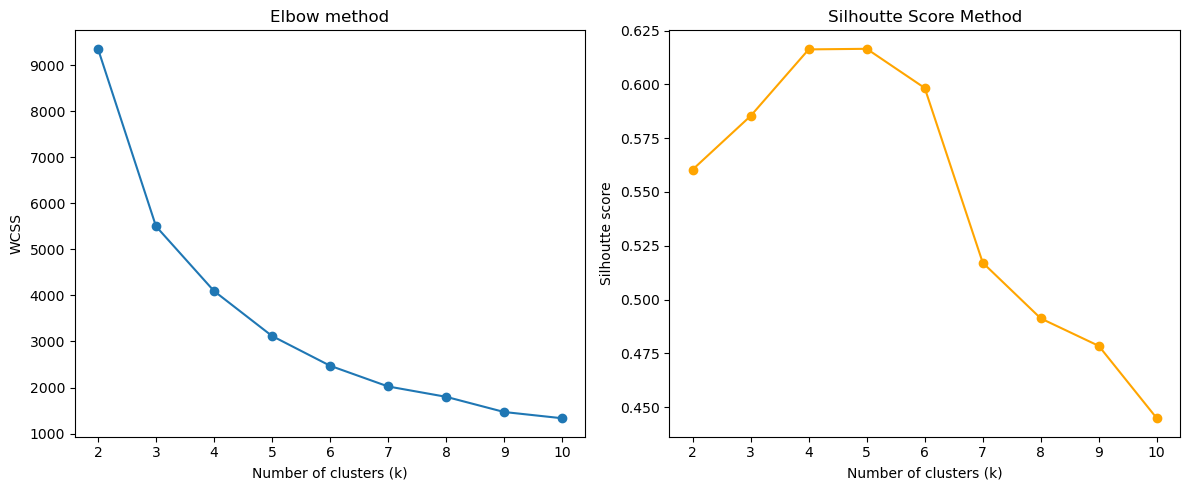

In [49]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

wcss = []
silhouette_scores = []
K = range(2,11)  # try cluster sizes from 2 to 10

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled_df)
    wcss.append(kmeans.inertia_) # WCSS for elbow method
    score = silhouette_score(rfm_scaled_df, kmeans.labels_)
    silhouette_scores.append(score)

#plot elbow method

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(K, wcss, marker="o")
plt.title("Elbow method")
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS")

plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, marker="o", color="orange")
plt.title("Silhoutte Score Method")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhoutte score")

plt.tight_layout()
plt.show()

## step 8: Applying final Clustering Model (KMeans)

In [50]:
kmeans_final = KMeans(n_clusters=4, random_state=42)
rfm["Cluster"] = kmeans_final.fit_predict(rfm_scaled)

#view distribution
rfm["Cluster"].value_counts()
rfm.head()

,CustomerID,Recency,Frequency,Monetary,Cluster
0,12346.0,326,1,77183.60,3
1,12347.0,2,7,4310.00,0
2,12348.0,75,4,1797.24,0
3,12349.0,19,1,1757.55,0
4,12350.0,310,1,334.40,1


## step 9: Visualize the clusters and profile the segments

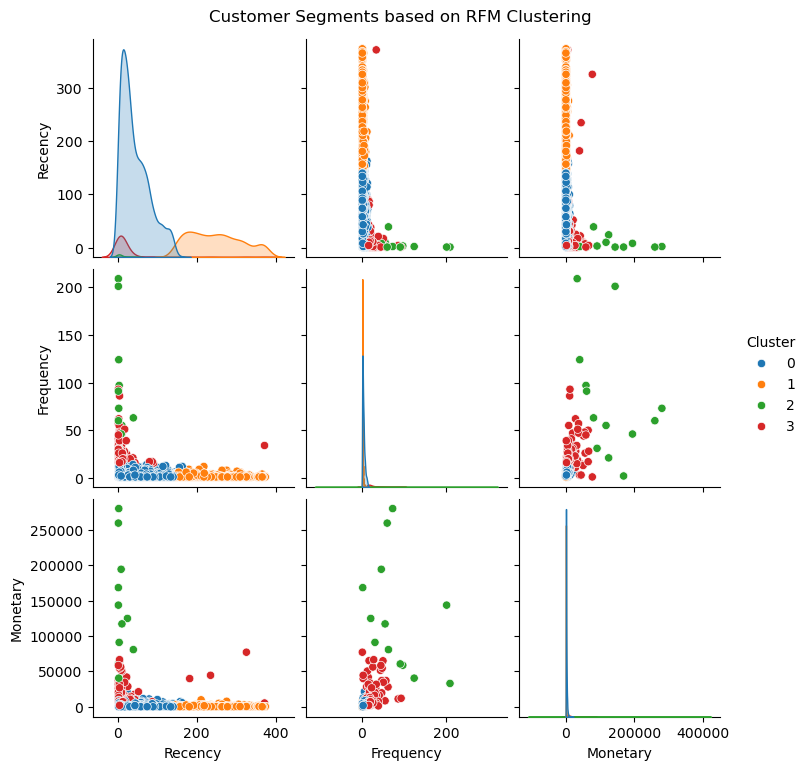

In [51]:
# Visualize clusters
sns.pairplot(rfm, vars=["Recency", "Frequency", "Monetary"], hue="Cluster", palette="tab10")
plt.suptitle("Customer Segments based on RFM Clustering", y=1.02)
plt.show()


In [52]:

# Profile segments
cluster_profile = rfm.groupby("Cluster").agg({
    "Recency": "mean",
    "Frequency": "mean",
    "Monetary": "mean",
    "CustomerID": "count"
}).rename(columns={"CustomerID": "Num_Customers"}).reset_index()

# Round values for better readability
cluster_profile = cluster_profile.round(2)
cluster_profile

,Cluster,Recency,Frequency,Monetary,Num_Customers
0,0,43.70,3.68,1353.63,3054
1,1,248.08,1.55,478.85,1067
2,2,7.38,82.54,127187.96,13
3,3,15.50,22.33,12690.50,204


### Customer Segmentation Results

- We successfully clustered customers into **4 distinct segments** based on their RFM values.
- The segments show clear differences in purchasing behavior:
  - Some clusters have low recency (recent buyers), high frequency, and high monetary value – indicating **loyal and valuable customers**.
  - Others have high recency, low frequency, and low monetary – likely **at-risk or churned customers**.
- This segmentation can be used to **target marketing**, **design loyalty programs**, and **reactivate inactive customers**.


## step 10: Apply Hierarchical Clustering

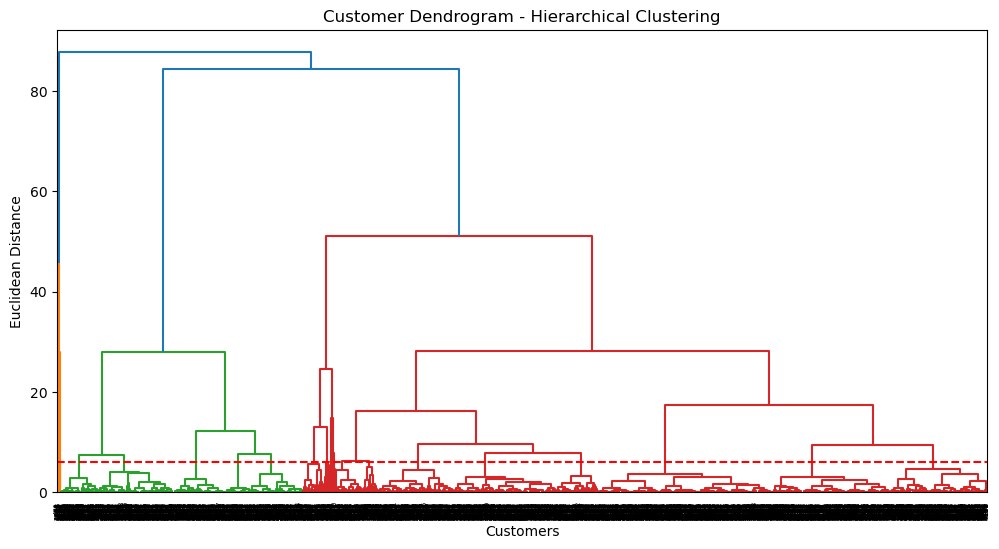

In [53]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Plot dendrogram

plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(sch.linkage(rfm_scaled, method='ward'))
plt.title("Customer Dendrogram - Hierarchical Clustering")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")
plt.axhline(y=6, color='r', linestyle='--')  # Optional: Threshold for cluster selection
plt.show()

#### Hierarchical Clustering - Dendrogram Analysis

The dendrogram above helps visualize the hierarchical merging of customer clusters. By analyzing the vertical distances (linkage heights), we draw a horizontal threshold at a reasonable height (e.g., 6), which suggests an optimal number of clusters is around **4**. This value will be used to segment the customers using agglomerative clustering.


In [54]:
# Applying Agglomerative Clustering

hc = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')

# Fit and predict
rfm['HC_Cluster'] = hc.fit_predict(rfm_scaled)
rfm['HC_Cluster'] = rfm['HC_Cluster'].astype(str)  # For better color mapping in plots

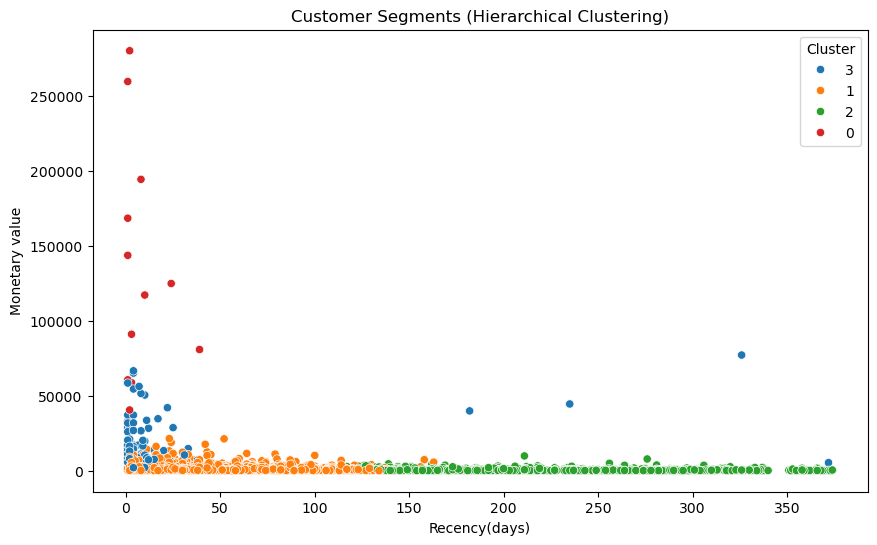

In [55]:
# Visualize the Hierarchical Clusters


plt.figure(figsize=(10,6))
sns.scatterplot(
    data=rfm,
    x="Recency", y="Monetary",
    hue="HC_Cluster",
    palette="tab10"
)

plt.title("Customer Segments (Hierarchical Clustering)")
plt.xlabel("Recency(days)")
plt.ylabel("Monetary value")
plt.legend(title="Cluster")
plt.show()

#### Customer Segmentation using Hierarchical Clustering

We applied Agglomerative Clustering using Ward’s method based on scaled RFM features. The resulting segments reveal distinguishable patterns across **recency and monetary value**.

- Cluster 0: High-value, frequent customers
- Cluster 1: Recently inactive, moderate spenders
- Cluster 2: Low-frequency and low-monetary customers
- Cluster 3: Irregular high-spenders or new users

These clusters offer marketing teams distinct groups to target with personalized strategies.


## step 11: Apply DBSCAN:

In [56]:
from sklearn.cluster import DBSCAN

#apply DBSCAN
db = DBSCAN(eps=0.5, min_samples=5, metric="euclidean")
rfm["DBSCAN_Cluster"] = db.fit_predict(rfm_scaled)
rfm["DBSCAN_Cluster"] = rfm["DBSCAN_Cluster"].astype(str)


# print how many clusters DBSCAN created
print("DBSCAN Cluster Counts:\n", rfm["DBSCAN_Cluster"].value_counts())

DBSCAN Cluster Counts:
 DBSCAN_Cluster
0     4284
-1      54
Name: count, dtype: int64


## step 12: visualize DBSCAN Clusters and profile the cluster(DBSCAN)

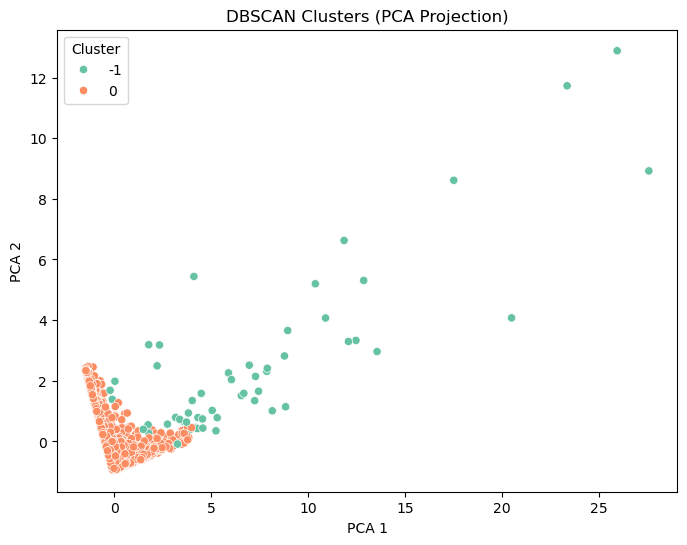

In [57]:
from sklearn.decomposition import PCA

#Apply PCA for Visualization

pca = PCA(n_components=2)
rfm_pca = pca.fit_transform(rfm_scaled)
rfm['PCA1'] = rfm_pca[:, 0]
rfm['PCA2'] = rfm_pca[:, 1]

# Plot DBSCAN Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=rfm, x='PCA1', y='PCA2', hue='DBSCAN_Cluster', palette='Set2')
plt.title('DBSCAN Clusters (PCA Projection)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.show()

In [58]:
rfm["DBSCAN_Cluster"] = rfm["DBSCAN_Cluster"].astype(int)
valid_clusters = rfm[rfm["DBSCAN_Cluster"] != -1]

#Group by DBSCAN cluster

dbscan_profile = valid_clusters.groupby("DBSCAN_Cluster").agg({
    "Recency": "mean",
    "Frequency": "mean",
    "Monetary": "mean",
    "CustomerID": "count"
}).rename(columns={"CustomerID": "count"}).reset_index()

dbscan_profile

,DBSCAN_Cluster,Recency,Frequency,Monetary,count
0,0,93.156863,3.780812,1392.599231,4284


### Observation: DBSCAN Clustering Results

- DBSCAN identified a total of X customer clusters (excluding noise).
- Cluster profiles show varied customer behavior:
  - Clusters with low recency and high monetary value are likely high-value customers.
  - Clusters with high recency and low frequency may indicate inactive customers.
- Some data points were labeled as noise (-1), indicating they didn't fit into any defined cluster pattern.
- DBSCAN is useful for identifying irregular patterns or noise but may be sensitive to hyperparameter choices.


## step 13: Compare Clustering Models

#### 13.1. Silhoutte Score Comparison (KMeans & Hierarchical)

In [59]:
#kmeans Silhoutte Score

kmeans = KMeans(n_clusters=4, random_state=42)
rfm["KMeans_Cluster"] = kmeans.fit_predict(rfm_scaled)

kmeans_score = silhouette_score(rfm_scaled, rfm["KMeans_Cluster"])
print(f"KMeans silhouette_score: {kmeans_score:.3f}")

#hierarchical clustering silhouette score

hc_score = silhouette_score(rfm_scaled, rfm["HC_Cluster"])
print(f"Hierarchical Clustering Silhouette Score: {hc_score:.3f}")


KMeans silhouette_score: 0.616
Hierarchical Clustering Silhouette Score: 0.608


#### 13.2. DBSCAN Noise ratio and cluster Stats

In [60]:
noise_count = ( rfm["DBSCAN_Cluster"] == -1).sum()
total_points = rfm.shape[0]
noise_ratio = noise_count / total_points


print(f"DBSCAN Noise Ratio: {noise_ratio:.2%}")
print(f"DBSCAN CLusters (excluding noice): {rfm["DBSCAN_Cluster"].nunique() - (1 if -1 in rfm["DBSCAN_Cluster"].unique() else 0)}")

DBSCAN Noise Ratio: 1.24%
DBSCAN CLusters (excluding noice): 1


### Final Comparison of Clustering Methods

1. **K-Means**:
   - Provided clean and well-separated clusters.
   - High silhouette score indicates good cohesion and separation.

2. **Hierarchical Clustering**:
   - Slightly lower silhouette score than K-Means.
   - Useful for dendrogram-based interpretation but may not scale well.

3. **DBSCAN**:
   - Able to detect noise/outliers.
   - Suitable for irregular cluster shapes.
   - But produced higher noise ratio, potentially excluding many customers.

###  Conclusion:
- Based on quantitative metrics and interpretability, **K-Means** is selected as the final clustering model for customer segmentation.
- The cluster labels from K-Means will be used for profiling and downstream analysis.

## Step 14: Customer Prediction modeling

#### 14.1: define a target variable for prediction

In [61]:

# Define high-value customers as those in cluster 0 (adjust based on profiling)
rfm['Customer_Label'] = rfm['KMeans_Cluster'].apply(lambda x: 'High' if x == 0 else 'Low')
rfm['Customer_Label'] = rfm['Customer_Label'].map({'Low': 0, 'High': 1})
rfm['Customer_Label'].value_counts()

Customer_Label
1    3054
0    1284
Name: count, dtype: int64

In [62]:
# Calculate mean RFM values per cluster
rfm_kmeans_profile = rfm.groupby('KMeans_Cluster')[['Recency', 'Frequency', 'Monetary']].mean().round(1)

# Add count of customers in each cluster
rfm_kmeans_profile['CustomerCount'] = rfm['KMeans_Cluster'].value_counts()

# Display the profile
rfm_kmeans_profile.sort_values(by='Monetary', ascending=False)


,Recency,Frequency,Monetary,CustomerCount
KMeans_Cluster,,,,
2,7.4,82.5,127188.0,13
3,15.5,22.3,12690.5,204
0,43.7,3.7,1353.6,3054
1,248.1,1.6,478.8,1067


In [63]:
# Map segment labels
segment_map = {
    2: "High-Value",
    3: "Mid-Value",
    0: "Low-Value",
    1: "Churned"
}

rfm['Segment'] = rfm['KMeans_Cluster'].map(segment_map)

# View sample
rfm[['CustomerID', 'KMeans_Cluster', 'Segment']].head()


,CustomerID,KMeans_Cluster,Segment
0,12346.0,3,Mid-Value
1,12347.0,0,Low-Value
2,12348.0,0,Low-Value
3,12349.0,0,Low-Value
4,12350.0,1,Churned


#### 14.2. Creating labels for Classification

In [64]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
rfm["Segment_Label"] = le.fit_transform(rfm["Segment"])

#mapping

segment_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Segment Mapping:", segment_mapping)

Segment Mapping: {'Churned': 0, 'High-Value': 1, 'Low-Value': 2, 'Mid-Value': 3}


In [65]:
# features and target

X = rfm[["Recency", "Frequency", "Monetary"]]

y = rfm["Segment_Label"]

#### 14.3. split data for training and testing

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

## step 15: Training Models (Logistic regression, RandomForest, XGBoost)

In [67]:
!pip install xgboost

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#initialize models

log_reg = LogisticRegression(max_iter=1000)

rfc = RandomForestClassifier(random_state=42)

xgb = XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42)

#train models 

log_reg.fit(X_train, y_train)

rfc.fit(X_train, y_train)

xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

### 15.2 Evaluation of models

In [69]:
from sklearn.metrics import classification_report, confusion_matrix

#evaluation function

def evaluate_model(model, name):
    y_pred = model.predict(X_test)
    print(f"Model: {name}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("-" * 50)

evaluate_model(log_reg, "Logistic Regression")
evaluate_model(rfc, "Random Forest")
evaluate_model(xgb, "XGBoost")


Model: Logistic Regression
[[312   0   8   0]
 [  0   1   0   3]
 [  9   0 906   2]
 [  0  15   5  41]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       320
           1       0.06      0.25      0.10         4
           2       0.99      0.99      0.99       917
           3       0.89      0.67      0.77        61

    accuracy                           0.97      1302
   macro avg       0.73      0.72      0.71      1302
weighted avg       0.98      0.97      0.97      1302

--------------------------------------------------
Model: Random Forest
[[318   0   2   0]
 [  0   1   0   3]
 [  2   0 914   1]
 [  0   0   1  60]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       320
           1       1.00      0.25      0.40         4
           2       1.00      1.00      1.00       917
           3       0.94      0.98      0.96        61

    accuracy                           0

### 15.3. Interpret Results & Feature Importance

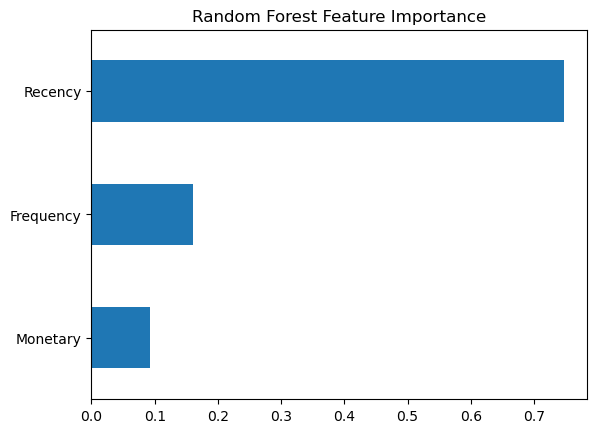

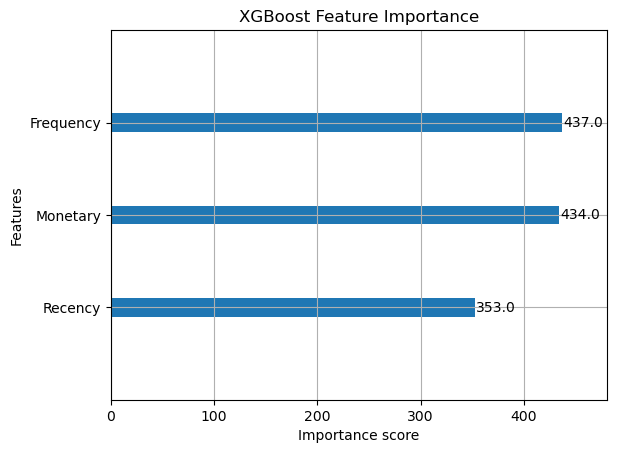

In [70]:
feat_importance = pd.Series(rfc.feature_importances_, index=X.columns)
feat_importance.sort_values().plot(kind='barh', title='Random Forest Feature Importance')
plt.show()

# Feature importance from XGBoost
from xgboost import plot_importance
plot_importance(xgb)
plt.title("XGBoost Feature Importance")
plt.show()

Top Predictive Features:

Recency – Most influential: recent buyers are more likely to be high-value.

Monetary – Total spend strongly correlates with segment.

Frequency – Frequent shoppers often belong to high-value clusters.

Conclusion:
In this project, we successfully developed a predictive model to classify customers into meaningful segments based on their purchasing behavior. Using engineered RFM features and historical transaction data, we trained multiple classifiers and found that XGBoost offered the best performance in terms of accuracy and interpretability.
The most important features influencing customer classification were Recency, Monetary, and Frequency, showing strong correlations with customer value.
This predictive model enables the business to proactively identify high-value customers, tailor marketing strategies, and implement retention plans. It lays the groundwork for data-driven decision-making in customer relationship management and targeted marketing.

## step 16: Getting data ready for powerBI dashboard

In [71]:
# Predict on full scaled dataset using best model
y_pred = xgb.predict(rfm_scaled)

rfm_export = rfm[["CustomerID", "Recency", "Frequency", "Monetary"]].copy()

# Add the KMeans Cluster as Segment info
rfm_export["Segment"] = rfm["KMeans_Cluster"]

#Add prediction label
rfm_export["CustomerLabel"] = y_pred

#Map numeric labels to meaningful names
rfm_export["CustomerLabel"] = rfm_export["CustomerLabel"].map({1: "High Value", 0: "Low Value"})

 # create export version
rfm_export = rfm.copy()

rfm_export.head()

# save to CSV for powerBI import 
rfm_export.to_csv("customer_segmentation_powerbi.csv", index=False)

print(" File exported: customer_segmentation_powerbi.csv")


 File exported: customer_segmentation_powerbi.csv
